In [2]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('text',usetex=True)
plt.rc('font',family='serif')
plt.rcParams['xtick.labelsize']=13
plt.rcParams['ytick.labelsize']=13
plt.rcParams['axes.labelsize']=16
plt.rcParams['axes.titlesize']=16

# Geography

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-445277.9631730949,4865942.279503176,333958.4723798198,5449979.971864045&bboxSR=3857&imageSR=3857&size=3000,2248&dpi=96&format=png32&transparent=true&f=image


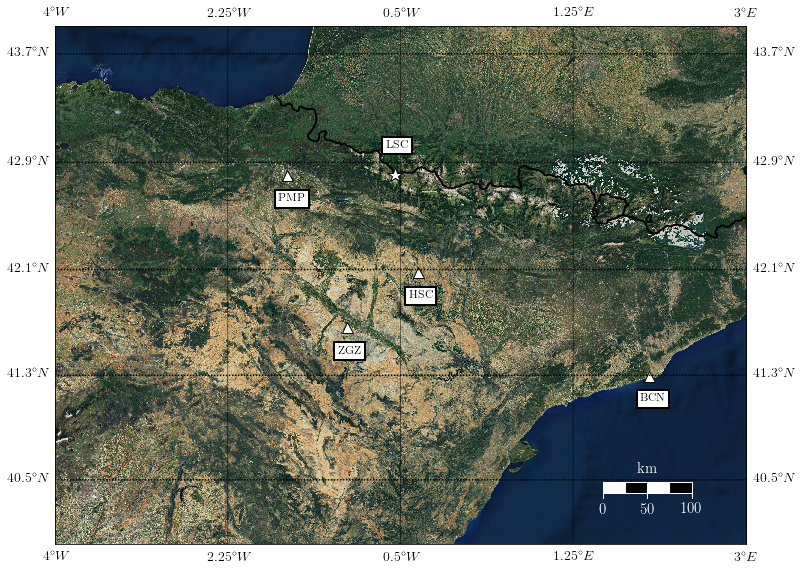

In [7]:
# create new figure, axes instances.
fig=plt.figure(figsize=(12, 10))
ax=fig.add_axes([0.1,0.1,0.8,0.8])
bbprops= dict(boxstyle="square,pad=0.3", fc="white", ec="k", lw=2)
# setup mercator map projection.
m = Basemap(llcrnrlon=-4.,llcrnrlat=40,urcrnrlon=3.,urcrnrlat=43.9,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='f',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20., epsg=3857)
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 3000, verbose= True)
#m.drawcoastlines()
m.drawcountries(linewidth=2)
# draw stations
## BCN
x, y = m(2+0.4/60+42/60**2, 41+17/60+49/60**2)
m.plot(x, y, marker='^', markeredgecolor='k', color='w', markersize=11)
plt.annotate('BCN', xycoords='data', xy=(x-1e4, y-3e4), bbox=bbprops, fontsize=12)
## PMP
x, y = m(-(1 + 38/60 + 49/60**2), 42 + 48/60 + 21/60**2)
m.plot(x, y, marker='^', markeredgecolor='k', color='w', markersize=11)
plt.annotate('PMP', xycoords='data', xy=(x-1e4, y-3e4), bbox=bbprops, fontsize=12)
## HSC
x, y = m(-(19/60 + 24/60**2), 42 + 4/60 + 51/60**2)
m.plot(x, y, marker='^', markeredgecolor='k', color='w', markersize=11)
plt.annotate('HSC', xycoords='data', xy=(x-1e4, y-3e4), bbox=bbprops, fontsize=12)
## ZGZ
x, y = m(-(1 + 2/60 + 30/60**2), 41 + 39/60 + 58/60**2)
m.plot(x, y, marker='^', markeredgecolor='k', color='w', markersize=11)
plt.annotate('ZGZ', xycoords='data', xy=(x-1e4, y-3e4), bbox=bbprops, fontsize=12)
## LSC
x, y = m(-(33/60 + 28/60**2), 42 + 48/60 + 21/60**2)
m.plot(x, y, marker='*', markeredgecolor='k', color='w', markersize=16)
plt.annotate('LSC', xycoords='data', xy=(x-1e4, y+3e4), bbox=bbprops, fontsize=12)
parallels = np.round(np.linspace(40.5, 43.7, 5), 2)
m.drawparallels(parallels, labels=[1,1,0,0], linewidth=1.5, fontsize=14)
meridians = np.linspace(-4, 3, 5)
m.drawmeridians(meridians, labels=[0,0,1,1], linewidth=1, fontsize=14)
m.drawmapscale(2, 40.44, 3.3, 41.5, 100, barstyle='fancy', fontsize=15, linewidth=1, fontcolor='w')
plt.show()
fig.savefig('./Map.png', dpi=100)

In [8]:
def png_toeps(path, out, conv = 'L'):
    # L => B&W pic
    from PIL import Image
    img = Image.open(path).convert(conv)
    img.save(out)

In [10]:
png_toeps('Map.png', './Mapgrey.png')

# Importance plot

In [3]:
EAMRn =  [6.455543160438538, 7.072296301523845, 5.512895782788594, 6.013731161753337, 5.69798743724823, 7.423967639605205, 6.364539464314778, 6.2372556527455645, 6.473839322725932, 5.8800021807352705, 5.93059766292572, 7.802989721298218, 6.162115295728047, 5.541943788528442, 7.414313832918803, 6.553581555684407, 5.6810409228007, 5.992370208104451, 5.542460680007935, 6.526913444201152, 5.636475443840027, 6.901504993438721, 9.021165450414022, 6.334753394126892, 6.274289449055989]
EAM_BCN =  [6.16275954246521, 5.701338926951091, 5.853175123532613, 6.004204909006755, 5.4231016635894775, 6.746338407198588, 6.384002288182576, 5.861535906791687, 5.879589597384135, 5.776523272196452, 5.59281591574351, 6.045260588328044, 6.966628034909566, 6.346726099650065, 6.0387217203776045, 6.139764428138733, 5.813184499740601, 5.939867337544759, 5.598189036051433, 5.696633179982503, 5.33791979153951, 5.242201288541158, 5.7235389947891235, 6.566652894020081, 6.145748297373454]
EAM_PMP =  [6.171736081441243, 6.032948096593221, 6.2267671426137285, 4.585991024971008, 6.069047768910726, 5.547447760899861, 5.408446550369263, 6.440662860870361, 5.938269257545471, 6.103848417599996, 5.331648786862691, 5.238194584846497, 6.373743335405986, 5.51784360408783, 6.392698725064595, 6.356711149215698, 5.545058290163676, 5.684237281481425, 5.954345782597859, 6.107104063034058, 5.698317170143127, 5.9570006132125854, 5.6505701541900635, 5.7907891273498535, 5.938798189163208]
EAM_ZGZ =  [5.578525900840759, 5.761840144793193, 7.172967553138733, 6.152630845705668, 7.4824966589609785, 5.977097352345784, 5.487711985905965, 5.622631867726644, 5.825459241867065, 6.755466143290202, 6.267374952634175, 6.515908757845561, 5.8914981285731, 5.482475479443868, 7.341012318929036, 6.474547028541565, 6.371235688527425, 5.8407972653706866, 5.842097957928975, 5.589353879292806, 6.009651740392049, 6.356587092081706, 5.969763000806172, 6.107420245806376, 6.880016803741455]
EAM_HSC =  [6.583736300468445, 6.8315335512161255, 5.941060423851013, 6.273655613263448, 5.631256262461345, 5.444688558578491, 6.097360412279765, 6.071695446968079, 6.005175630251567, 5.371678511301677, 6.4383284250895185, 6.076025525728862, 5.479027152061462, 6.510177731513977, 6.027319272359212, 6.199570616086324, 6.122778534889221, 5.7268762191136675, 5.845083475112915, 6.002572337786357, 6.0272230704625445, 5.770824631055196, 5.916007041931152, 5.7001872062683105, 6.175832788149516]

In [4]:
DF = pd.DataFrame({'Rn': EAMRn, 'BCN': EAM_BCN, 'PMP': EAM_PMP, 'ZGZ': EAM_ZGZ, 'HSC': EAM_HSC})
desc = DF.describe()
desc

,Rn,BCN,PMP,ZGZ,HSC
count,25.000000,25.000000,25.000000,25.000000,25.000000
mean,6.417943,5.959457,5.842489,6.190263,6.010787
std,0.827186,0.417528,0.432668,0.571711,0.355106
min,5.512896,5.242201,4.585991,5.482475,5.371679
25%,5.880002,5.701339,5.547448,5.825459,5.770825
50%,6.274289,5.879590,5.938798,6.009652,6.027223
75%,6.553582,6.145748,6.107104,6.474547,6.175833
max,9.021165,6.966628,6.440663,7.482497,6.831534


In [5]:
def f(x):
    return 1e11*np.exp(-3*x)

http://server.arcgisonline.com/ArcGIS/rest/services/ESRI_Imagery_World_2D/MapServer/export?bbox=-445277.9631730949,4865942.279503176,333958.4723798198,5449979.971864045&bboxSR=3857&imageSR=3857&size=3000,2248&dpi=96&format=png32&transparent=true&f=image


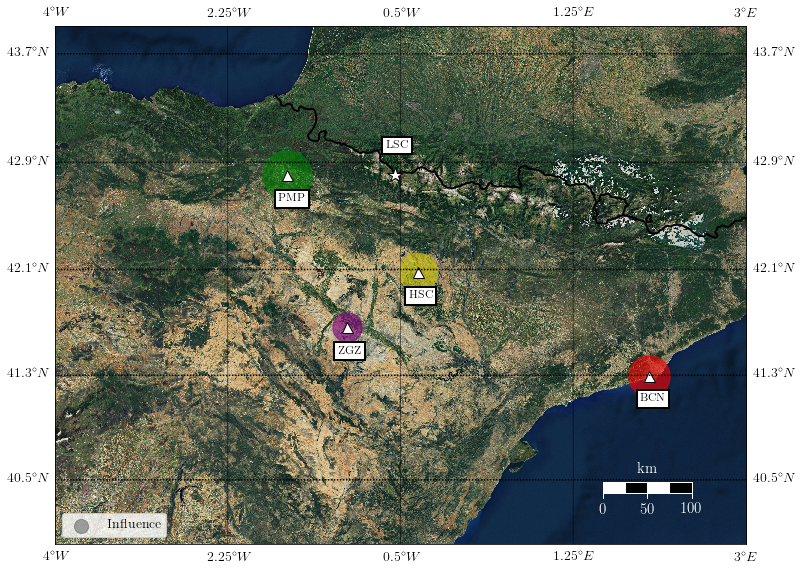

In [6]:
# create new figure, axes instances.
fig=plt.figure(figsize=(12, 10))
ax=fig.add_axes([0.1,0.1,0.8,0.8])
bbprops= dict(boxstyle="square,pad=0.3", fc="white", ec="k", lw=2)
# setup mercator map projection.
m = Basemap(llcrnrlon=-4.,llcrnrlat=40,urcrnrlon=3.,urcrnrlat=43.9,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='f',projection='merc',\
            lat_0=40.,lon_0=-20.,lat_ts=20., epsg=3857)
m.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 3000, verbose= True)
m.drawcountries(linewidth=2)
# draw stations
## BCN
x, y = m(2+0.4/60+42/60**2, 41+17/60+49/60**2)
m.scatter(x, y, s=200, c='dimgray', alpha=0.6, label='Influence')
m.plot(x, y, marker='^', markeredgecolor='k', color='w', markersize=11)
m.scatter(x, y, s=f(desc['BCN']['mean']), c='r', alpha=0.6)
plt.annotate('BCN', xycoords='data', xy=(x-1e4, y-3e4), bbox=bbprops, fontsize=12)
## PMP
x, y = m(-(1 + 38/60 + 49/60**2), 42 + 48/60 + 21/60**2)
m.plot(x, y, marker='^', markeredgecolor='k', color='w', markersize=11)
m.scatter(x, y, s=f(desc['PMP']['mean']), c='g', alpha=0.6)
plt.annotate('PMP', xycoords='data', xy=(x-1e4, y-3e4), bbox=bbprops, fontsize=12)
## HSC
x, y = m(-(19/60 + 24/60**2), 42 + 4/60 + 51/60**2)
m.plot(x, y, marker='^', markeredgecolor='k', color='w', markersize=11)
m.scatter(x, y, s=f(desc['HSC']['mean']), c='y', alpha=0.6)
plt.annotate('HSC', xycoords='data', xy=(x-1e4, y-3e4), bbox=bbprops, fontsize=12)
## ZGZ
x, y = m(-(1 + 2/60 + 30/60**2), 41 + 39/60 + 58/60**2)
m.plot(x, y, marker='^', markeredgecolor='k', color='w', markersize=11)
m.scatter(x, y, s=f(desc['ZGZ']['mean']), c='purple', alpha=0.6)#, label='Influence')
plt.annotate('ZGZ', xycoords='data', xy=(x-1e4, y-3e4), bbox=bbprops, fontsize=12)
## LSC
x, y = m(-(33/60 + 28/60**2), 42 + 48/60 + 21/60**2)
m.plot(x, y, marker='*', markeredgecolor='k', color='w', markersize=16)
plt.annotate('LSC', xycoords='data', xy=(x-1e4, y+3e4), bbox=bbprops, fontsize=12)
parallels = np.round(np.linspace(40.5, 43.7, 5), 2)
m.drawparallels(parallels, labels=[1,1,0,0], linewidth=1.5, fontsize=14)
meridians = np.linspace(-4, 3, 5)
m.drawmeridians(meridians, labels=[0,0,1,1], linewidth=1, fontsize=14)
m.drawmapscale(2, 40.44, 3.3, 41.5, 100, barstyle='fancy', fontsize=15, linewidth=1, fontcolor='w')
plt.legend(fontsize=14)
plt.show()
fig.savefig('./InfluenceMap.png', dpi=100)